Google Colab workflow with Drive mount for METABRIC_cleaned_imputed.csv

In [1]:
#1 Connect Google Drive to Colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Step #1** Demonstrates how to mount a user's Google Drive to the Colab environment, enabling access to files stored in Drive directly from the notebook. This is achieved using the google.colab module: first, the drive submodule is imported, and then drive.mount('/content/drive') is executed. This command links the Drive to the /content/drive directory within the Colab file system. Once mounted, the output confirms the successful connection with the message: Mounted at /content/drive. This step is essential for loading datasets, saving outputs, or accessing any resources stored in Google Drive during a Colab session.

In [2]:
#2 Initialize Project Folder Paths

from pathlib import Path

# Adjust to your actual folder structure in Drive
PROJECT_ROOT = Path('/content/drive/MyDrive/projects/metabric')
DATA_DIR = PROJECT_ROOT / 'data'
NOTEBOOKS_DIR = PROJECT_ROOT / 'notebooks'
OUTPUTS_DIR = PROJECT_ROOT / 'outputs'
OUTPUTS_DIR.mkdir(parents=True, exist_ok=True)

CSV_PATH = DATA_DIR / 'METABRIC_cleaned_imputed.csv'


**Step #2** The code establishes a structured set of directory paths for organizing a data science project within Google Drive using Python’s pathlib library. It begins by setting PROJECT_ROOT to the main project folder, then defines subdirectories for data (DATA_DIR), notebooks (NOTEBOOKS_DIR), and outputs (OUTPUTS_DIR). The OUTPUTS_DIR.mkdir(parents=True, exist_ok=True) command ensures the outputs folder exists, creating it if necessary. Finally, it sets CSV_PATH to point to the METABRIC dataset file (METABRIC_cleaned_imputed.csv) located in the data directory. This setup promotes reproducibility and clarity by centralizing file paths and preparing the environment for downstream tasks like data loading and result saving.

In [3]:
#3 Import and Preview METABRIC Dataset

import pandas as pd
from pathlib import Path

# Correct the CSV_PATH based on the actual file location in Drive
CSV_PATH = Path('/content/drive/MyDrive/METABRIC_cleaned_imputed.csv')

df = pd.read_csv(CSV_PATH)
print(df.shape)
df.head()

(2509, 34)


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,76,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,139,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,84,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,49,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151,Recurred,Female,ER+/HER2- Low Prolif,15.0,2.0,Died of Disease
3,MB-0006,48,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,163,Not Recurred,Female,ER+/HER2- Low Prolif,25.0,2.0,Living
4,MB-0008,77,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,19,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


**Step #3**

In Step #3, the code loads the METABRIC breast cancer dataset into a pandas DataFrame for analysis. It begins by importing pandas and Path, then sets CSV_PATH to the location of the cleaned and imputed CSV file in Google Drive. Using pd.read_csv(CSV_PATH), the dataset is read into memory as df. The shape of the dataset is printed, revealing 2,509 rows and 34 columns, and df.head() displays the first few records. This step is essential for initializing the data exploration process, allowing inspection of schema, feature types, and clinical variables such as age, tumor size, subtype, and survival status.

In [4]:
#4 Initial Schema and Integrity Check

# Column info and types
df.info()

# Missing values check (should be low if imputed, but verify)
df.isna().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   int64  
 2   Type of Breast Surgery          2509 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     2509 non-null   object 
 6   Chemotherapy                    2509 non-null   object 
 7   Pam50 + Claudin-low subtype     2509 non-null   object 
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   object 
 10  ER Status                       2509 non-null   int64  
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status measured by SNP6    25

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,0
ER status measured by IHC,0


**Step #4** This step performs a foundational inspection of the dataset df to verify its structure and integrity before deeper analysis. The df.info() output confirms that the DataFrame contains 2,509 entries across 34 columns, with no missing values in any column—each has exactly 2,509 non-null entries. This suggests that the dataset has already undergone imputation or cleaning. The columns are a mix of categorical (object) and numerical (float64) types, which is crucial for downstream preprocessing decisions like encoding and scaling. The follow-up command df.isna().sum().sort_values(ascending=False).head(20) double-checks for missingness, reinforcing that imputation was successful and no further handling of nulls is required at this stage.

In [5]:
#5 Descriptive Statistics Export

# Numeric summary
numeric_summary = df.describe(include='number')

# Categorical summary
categorical_summary = df.describe(include='object')

# Save summaries
numeric_summary.to_csv(OUTPUTS_DIR / '01_numeric_summary.csv', index=True)
categorical_summary.to_csv(OUTPUTS_DIR / '01_categorical_summary.csv', index=True)


**Step #5** This step computes and saves descriptive statistics for both numeric and categorical features in the dataset. Using df.describe(include='number'), it generates a numeric summary that includes count, mean, standard deviation, min, max, and quartiles for each continuous variable. Simultaneously, df.describe(include='object') produces a categorical summary, capturing count, number of unique values, top (most frequent) category, and its frequency for each categorical column. These summaries are then exported as CSV files—01_numeric_summary.csv and 01_categorical_summary.csv—to the designated OUTPUTS_DIR, ensuring traceability and reuse in downstream reporting or analysis. This step is essential for understanding feature distributions and spotting anomalies early in the workflow.

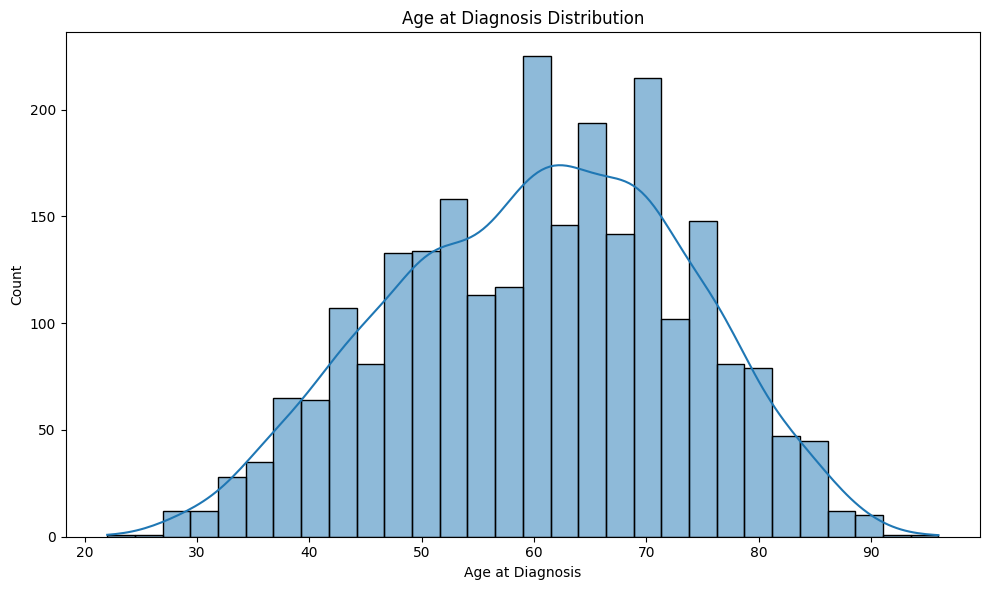

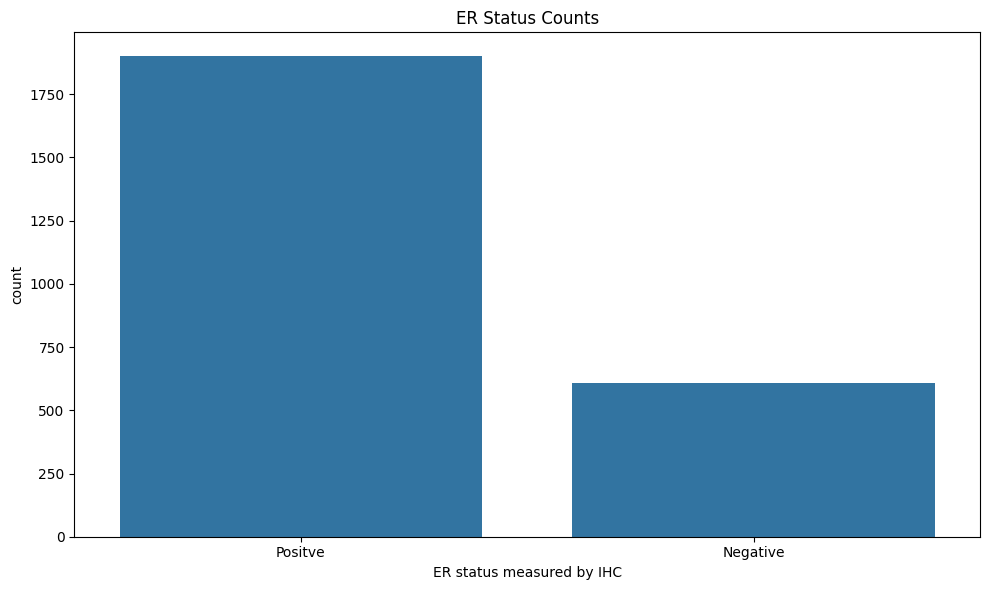

In [6]:
#6 Visual Feature Profiling

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Age at Diagnosis'], bins=30, kde=True)
plt.title('Age at Diagnosis Distribution')
plt.tight_layout()
plt.savefig(OUTPUTS_DIR / '01_age_distribution.png', dpi=200)

plt.figure(figsize=(10,6))
sns.countplot(x='ER status measured by IHC', data=df)
plt.title('ER Status Counts')
plt.tight_layout()
plt.savefig(OUTPUTS_DIR / '01_er_status_counts.png', dpi=200)

**Step #6** This step creates and saves visualizations to explore key distributions and categorical patterns in the dataset. First, a histogram with KDE overlay is plotted for the numeric feature 'Age at Diagnosis', using 30 bins to reveal the age distribution and density of patients at diagnosis. Second, a count plot is generated for the categorical feature 'ER status measured by IHC', showing the frequency of each estrogen receptor status category. Both plots are sized for clarity (10x6 inches), styled with titles, and saved as high-resolution PNG files (200 dpi) to the OUTPUTS_DIR. These visuals provide intuitive insights into feature behavior and are essential for spotting skewness, modality, or class imbalance before modeling.